# Waste Sorting Using Computer Vision using MobileNet

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set up paths to the train and test directories
base_dir = r'dataset\waste_classification_data'
train_dir = base_dir + r'\TRAIN'
test_dir = base_dir + r'\TEST'

In [3]:
# Use ImageDataGenerator to prepare the data for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 22564 images belonging to 2 classes.


In [5]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)

Found 2513 images belonging to 2 classes.


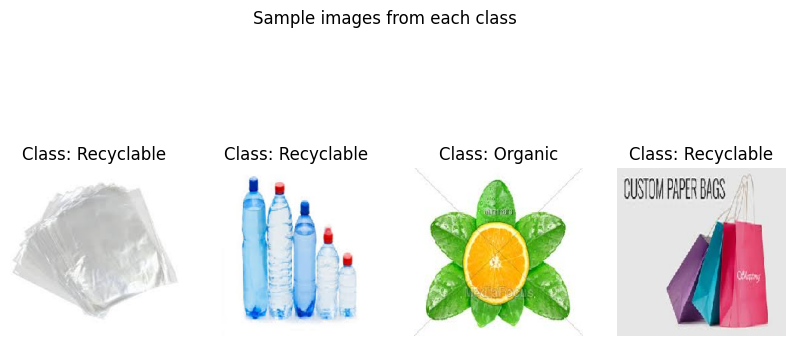

In [7]:
# Display sample images from each class
plt.figure(figsize=(10,5))
for i in range(4): # Display 4 images (2 from each calss if available)
    image, label = next(train_data)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])
    plt.title('Class: ' + ('Organic' if label[0] == 0 else 'Recyclable'))
    plt.axis('off')
plt.suptitle('Sample images from each class')
plt.show()

## Load and Configure MobileNet Model

In [10]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model.trainable = False

# Add custom layers for classification
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# We start with a pre-trained MobileNet model, adding layers to classify waste images into O or R

## Train the Model

In [11]:
history = model.fit(
    train_data,
    validation_data = test_data,
    epochs = 2
)

# After training the model, save it to a file
model.save('models/mobilenet_waste_classifier.h5')

loss, accuracy = model.evaluate(test_data)
print('Model Accuracy: ', accuracy)

Epoch 1/2


d:\Devanshu_College\green_skilling_ai_workshop\code\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 347s 486ms/step - accuracy: 0.8621 - loss: 0.3174 - val_accuracy: 0.8798 - val_loss: 0.2782
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 354s 501ms/step - accuracy: 0.9338 - loss: 0.1728 - val_accuracy: 0.8938 - val_loss: 0.2504


79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 526ms/step - accuracy: 0.9008 - loss: 0.2407
Model Accuracy:  0.8937525153160095


## Evaluate the Model

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to bianry predictions
y_true = test_data.classes # true labels from test data

# Print classification report
print('Classification Report:\n', classification_report(y_true, y_pred, target_names=['Organic', 'Recyclable']))

# Print comfusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Here, we measure the performance of the model.

79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 435ms/step
Classification Report:
               precision    recall  f1-score   support

     Organic       0.58      0.65      0.61      1401
  Recyclable       0.48      0.41      0.44      1112

    accuracy                           0.54      2513
   macro avg       0.53      0.53      0.53      2513
weighted avg       0.54      0.54      0.54      2513

Confusion Matrix:
 [[907 494]
 [657 455]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step


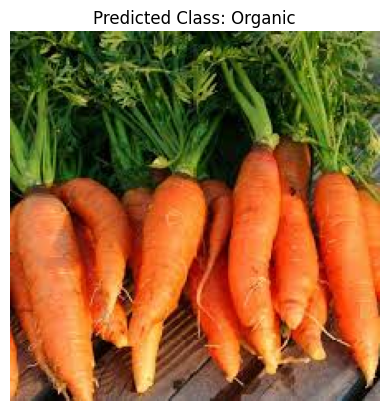

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the trained model and test image
model_path = r'models\mobilenet_waste_classifier.h5'
test_image_path = r'dataset\waste_classification_data\TEST\O\O_12568.jpg'

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Load and prepare the test image
test_img = load_img(test_image_path, target_size=(224,224)) # Load image and resize
test_img_array = img_to_array(test_img) / 255.0 # Normalize pixel values
test_img_array = np.expand_dims(test_img_array, axis=0) # Add batch dimension

# Predict the class of the test image
predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else 'Non Organic'

# Display the test image and prediction
plt.imshow(test_img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()